# Moments

Moments are numerical values that are commonly used to characterize the distribution of a random variable. They are expected values of powers of the random variable.  The most common moments are the mean, which is the first moment, and the variance, which is the second central moment.

In this section of [*Foundations of Data Science with Python*](https://amzn.to/48PvKip), you will learn:
* the definition of moments and central moments,
* how to interpret moments as integrals that applying weighting functions to different parts of the probability density,
* the definition of variance and standard deviation for random variables,
* why variance measures the "spread" of a distribution,
* how to use SymPy to compute means and variances of continuous random variables, and
* important properties of variance that are used in later sections of the book.

## Terminology and Properties Review

Use the flashcards below to help you review the terminology introduced in this chapter. $~~~~ ~~~~ ~~~~$

In [14]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'moments.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='09-moments/flashcards/'
display_flashcards(github+'moments.json')

<IPython.core.display.Javascript object>

## Code and Proof from Section 9.3

**Code for Fig 9.6**

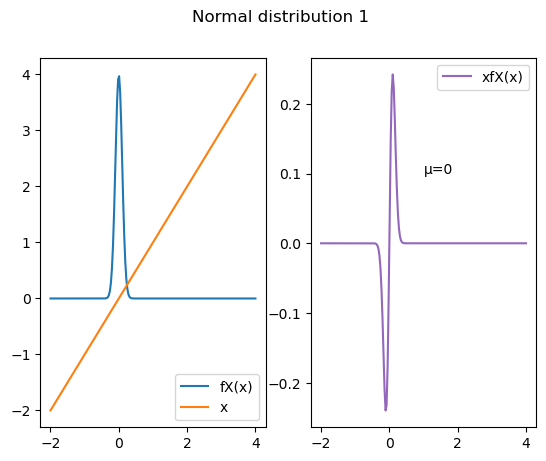

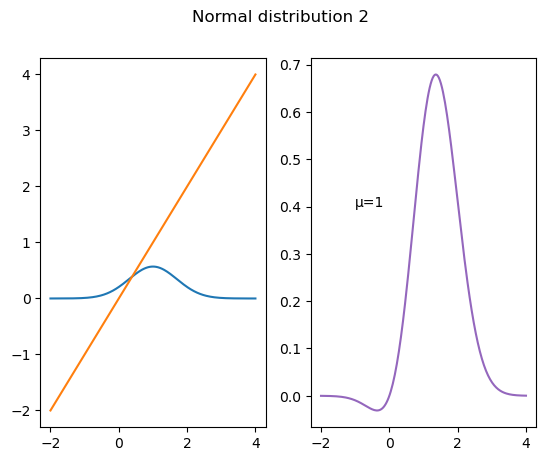

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

X1=stats.norm(0,0.1)
x1=np.linspace(-2,4,201)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Normal distribution 1')

ax[0].plot(x1, X1.pdf(x1), label='fX(x)')
ax[0].plot(x1, x1, label='x')
ax[0].legend()
ax[1].plot(x1, x1*X1.pdf(x1), color='C4', label='xfX(x)' )
ax[1].text(1, 0.1, 'μ=0')
ax[1].legend()

fig2, ax2 = plt.subplots(1, 2)
fig2.suptitle('Normal distribution 2')

X2=stats.norm(1, 0.7)
x2=x1

ax2[0].plot(x2, X2.pdf(x2))
ax2[0].plot(x2, x2)
ax2[1].plot(x2, x2*X2.pdf(x2), color='C4' );
ax2[1].text(-1, 0.4, 'μ=1');

**Proof that the mean of a Normal random variable is the parameter $\mu$**

\begin{align*}
E[X] = \int_{-\infty}^{\infty} x \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right).
\end{align*}

Now we add and subtract a term,
\begin{align*}
E[X] = &\int_{-\infty}^{\infty} (x- \mu) \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right)\
&+ \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right).
\end{align*}

The first integral is 0 because of odd symmetry around $\mu$. This may be confusing to some who are used to only odd symmetry around 0, so let's do the change of variable $u = x-\mu$. With this change of variable, the region of integration is still $(-\infty, \infty)$:
\begin{align*}
E[X] =& \int_{-\infty}^{\infty} u \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{u}{\sigma} \right]^2 \right)\\
&+ \mu  \int_{-\infty}^{\infty} \cdot \frac{1}{\sigma \sqrt{2 \pi}}
\exp \left ( -\frac 1 2 \left[ \frac{x-\mu}{\sigma} \right]^2 \right).
\end{align*}
In addition to the change of variable, I pulled the constant term $\mu$ outside the second integral.  Then the first integral is 0 because of odd symmetry around 0. The second integral is 1 because it is the integral of the Normal density  function. So, $E[X] = \mu$.

**Code for Figure 9.7**

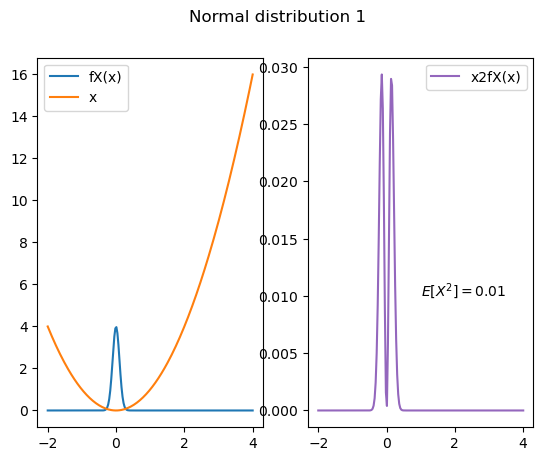

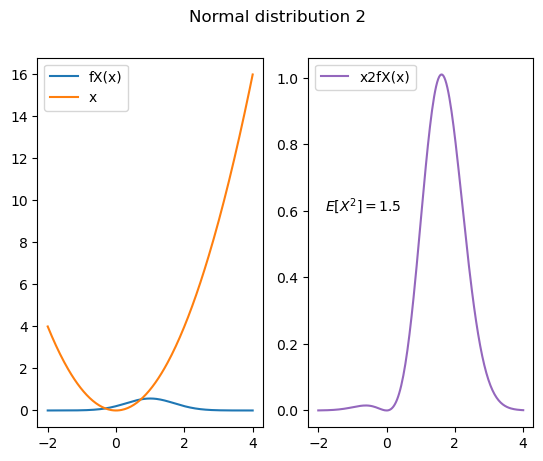

In [16]:

X1=stats.norm(0,0.1)
x1=np.linspace(-2,4,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='fX(x)')
ax3[0].plot(x1, x1**2, label='x')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='x2fX(x)' )
ax3[1].text(1, 0.01, f'$E[X^2] = {X1.moment(2):.2g}$')
ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 2')

X2=stats.norm(1, 0.7)
x2=x1


ax4[0].plot(x2, X2.pdf(x2),  label='fX(x)')
ax4[0].plot(x2, x2**2, label='x')
ax4[1].plot(x2, x2**2*X2.pdf(x2), color='C4', label='x2fX(x)');
ax4[0].legend()
ax4[1].legend()

ax4[1].text(-1.8, 0.6, f'$E[X^2] = {X2.moment(2):.2g}$');

**Code for Fig. 9.8**

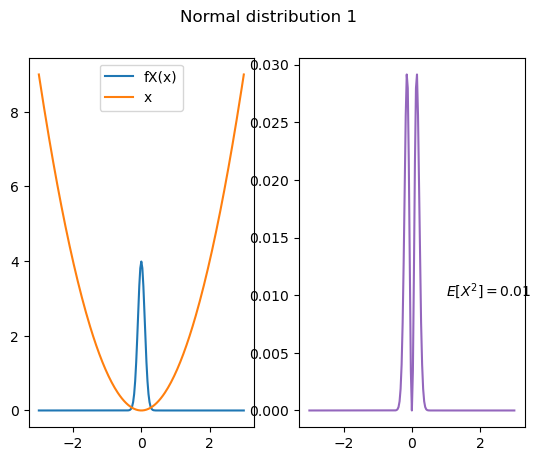

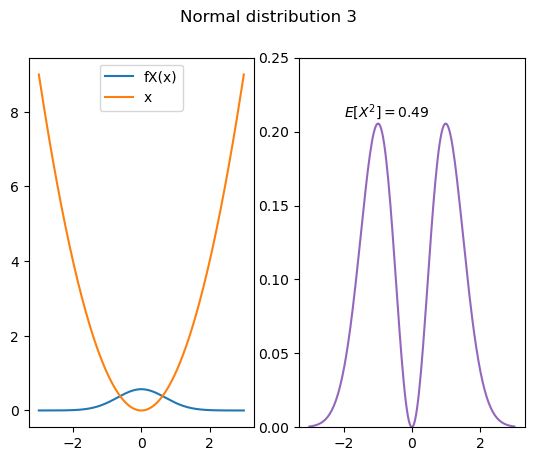

In [17]:
X1=stats.norm(0,0.1)
x1=np.linspace(-3, 3,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='fX(x)')
ax3[0].plot(x1, x1**2, label='x')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='x2fX(x)' )
ax3[1].text(1, 0.01, f'$E[X^2] = {X1.moment(2):.2g}$')
#ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 3')

X3=stats.norm(0, 0.7)
x3=x1


ax4[0].plot(x3, X3.pdf(x3), label='fX(x)')
ax4[0].plot(x3, x3**2, label='x')
ax4[1].plot(x3, x3**2*X3.pdf(x3), color='C4', label='x2fX(x)' );
ax4[1].text(-2, 0.21, f'$E[X^2] = {X3.moment(2):.2g}$');
ax4[0].legend()
#ax4[1].legend()
ax4[1].set_ylim(0, 0.25);

**Code fog Fig. 9.9**

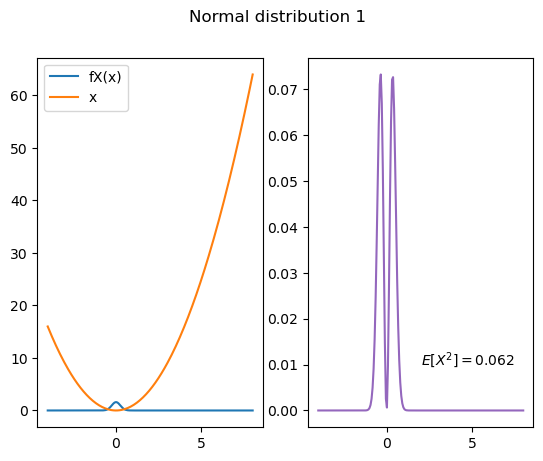

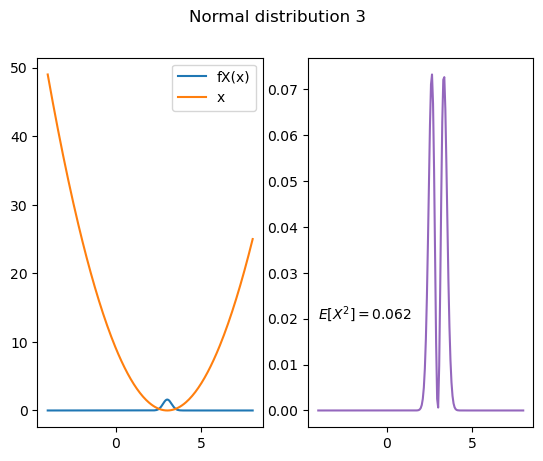

In [18]:

X1=stats.norm(0, 0.25)
x1=np.linspace(-4, 8,201)

fig3, ax3 = plt.subplots(1, 2)
fig3.suptitle('Normal distribution 1')

ax3[0].plot(x1, X1.pdf(x1), label='fX(x)')
ax3[0].plot(x1, x1**2, label='x')
ax3[0].legend()
ax3[1].plot(x1, x1**2*X1.pdf(x1), color='C4', label='x2fX(x)' )
ax3[1].text(2, 0.01, f'$E[X^2] = {X1.var():.2g}$')
#ax3[1].legend()

fig4, ax4 = plt.subplots(1, 2)
fig4.suptitle('Normal distribution 3')

X3=stats.norm(3, 0.25)
x3=x1


ax4[0].plot(x3, X3.pdf(x3), label='fX(x)')
ax4[0].plot(x3, (x3-3)**2, label='x')
ax4[1].plot(x3, (x3-3)**2*X3.pdf(x3), color='C4', label='x2fX(x)' );
ax4[1].text(-4, 0.02, f'$E[X^2] = {X3.var():.2g}$');
ax4[0].legend();

**Code for Fig. 9.10**

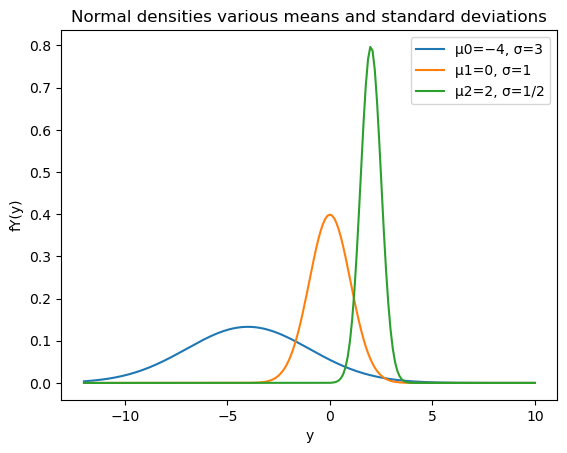

In [19]:
Y0 = stats.norm(loc = -4, scale =3 )
Y1 = stats.norm(loc = 0, scale = 1)
Y2 = stats.norm(loc = 2, scale = 1/2)

y=np.linspace(-12,10, 201)

plt.plot(y, Y0.pdf(y), 
         label = 'μ0=−4, σ=3' )
plt.plot(y, Y1.pdf(y), 
         label = 'μ1=0, σ=1' )
plt.plot(y, Y2.pdf(y), 
         label = 'μ2=2, σ=1/2' )

plt.title('Normal densities various means and standard deviations') 
plt.xlabel('y')
plt.ylabel('fY(y)')
plt.legend();